# K-means clustering 

K-Means clustering is the most popular unsupervised machine learning algorithm. K-means clustering is a machine learning algorithm used for grouping similar data points into clusters. The goal is to divide a set of data points into groups, or clusters, where each cluster represents data points that are more similar to each other than to those in other clusters.

## What is K ?

K is a free parameter. Say, K=2 means there will be 2 random points. These points would be placed anywhere. 

## How it is clustered?

Say, we have 2 clusters red and green. If the data point is near to our red cluster than the green cluster, then we put them into the red cluster. Each time we re-compute until we find none of the datapoints change their position.

## How to select K?

We find it using elbow method. 

### ELBOW method:

We start with some K. Then we compute SUM OF SQUARED ERROR.
SUM OF SQUARED ERROR means we compute the distance fo datasets and clusters and then we sum them up. For example,

SSE1 = SUM(i=0 to i=n)dist(xi - c1)^2

SSE2 = SUM(i=0 to i=n)dist(xi - c2)^2

SSE = SSE1 + SSE2 + .......

#### Then, 

Once we get that number we plot them (x axis=K, y axis=SSE). If we increase the value of 'K' then it will decrease the error. By doing this  at a certain point, SSE becomes 0. 

Now to find out the suitable K value: we take that point where the line looks like an elbow.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Importing data.

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
X = df.drop('Name', axis='columns')
X.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


# Plotting the data to find the suitable algorithm

Text(0, 0.5, 'Income($)')

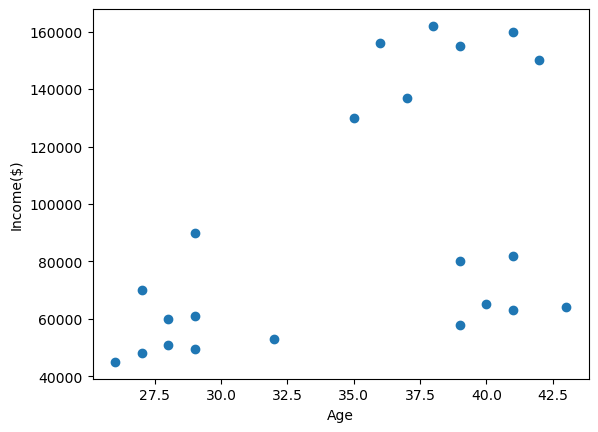

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0, n_init=10)
y_pred = kmeans.fit_predict(X)
y_pred

C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


# Plotting the clustered dataset

<function matplotlib.pyplot.legend(*args, **kwargs)>

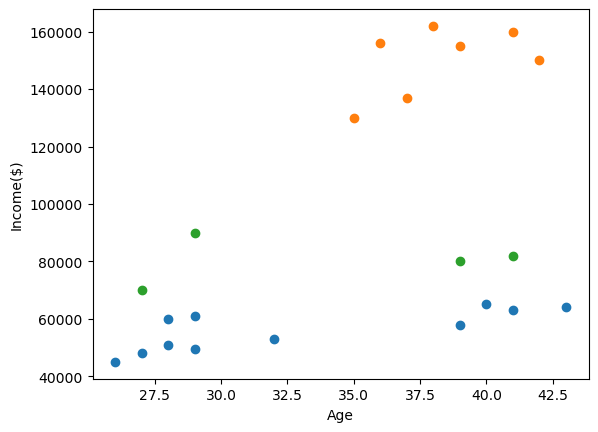

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'])
plt.scatter(df2.Age, df2['Income($)'])
plt.scatter(df3.Age, df3['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

Here, green and blue dots are not grouped properly. Because scaling is not right. We need to do some pre processing.

### Preprocessing using min max scaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [9]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


## Final use of KMean after preprocessing

In [11]:
km = KMeans(n_clusters=3)
y_prediction = km.fit_predict(df[['Age', 'Income($)']])
y_prediction

C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [12]:
df['new_cluster'] = y_prediction
df.drop('cluster', axis='columns', inplace=True)
df.head(10)

,Name,Age,Income($),new_cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [15]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

These are the centeroids.

# Final result

<function matplotlib.pyplot.legend(*args, **kwargs)>

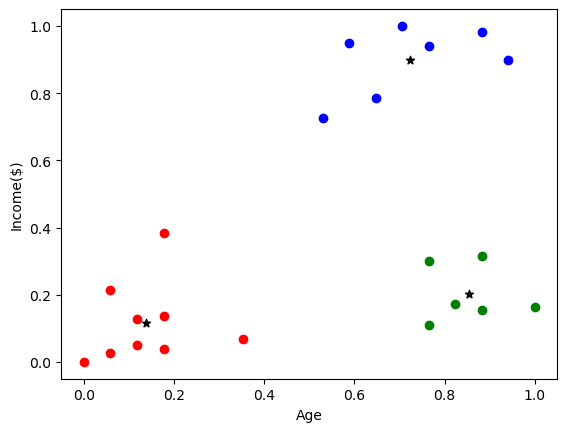

In [16]:
df1 = df[df.new_cluster==0]
df2 = df[df.new_cluster==1]
df3 = df[df.new_cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black',marker='*',label='centeroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

# Sum of Squared Error

In [18]:
k_rng = range(1,10)
sse = []
for i in k_rng:`
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\radwa\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

In [19]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.23022348815682744,
 0.16869711728567788,
 0.13265419827245162,
 0.10497488680620909]

# Elbow Plot

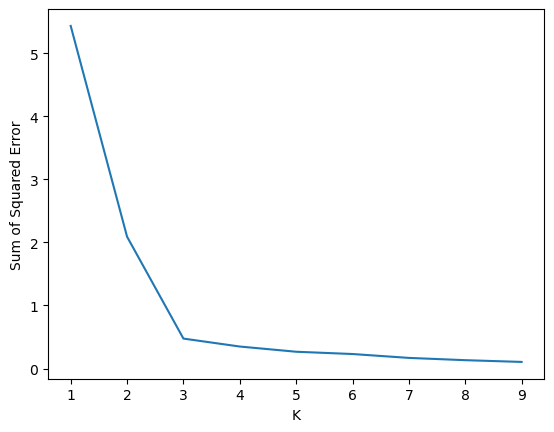

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

Here we can see that, elbow is located in point 3. 